3. Write your own function to equalize the histogram of an image. Apply this function to the
runway image.

C:\Users\ywcha\AppData\Local\Temp\ipykernel_16700\2776747185.py:24: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(equ_img.flatten(), 256, [0,256], color='r')


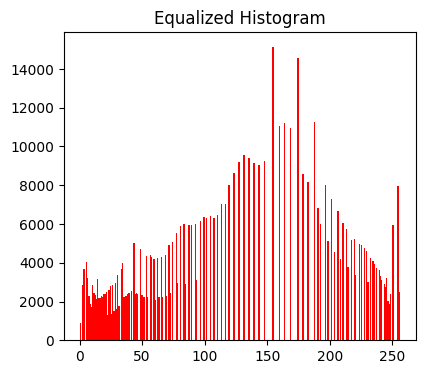

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def histogram_equalization(img):
    hist, bins = np.histogram(img.flatten(), 256, [0, 256])

    cdf = hist.cumsum()
    cdf_normalized = (cdf / cdf[-1]) *255

    lookup_table = np.round(cdf_normalized).astype('uint8')
    equalized_img = lookup_table[img]
    return equalized_img

img = cv.imread('media\\runway.png', cv.IMREAD_GRAYSCALE)

equ_img = histogram_equalization(img)
cv.imshow('Original Image', img)
cv.imshow('Equalized Image', equ_img)
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 2)
plt.title('Equalized Histogram')
plt.hist(equ_img.flatten(), 256, [0,256], color='r')
plt.show()
cv.waitKey(0)
cv.destroyAllWindows()